# Sorting Algorithms 

## Imports

In [1]:
from numba import jit
import random 
import timeit
import numpy as np 
import pandas as pd

## Merge Sort

In [2]:
@jit
def mergesort(a):
    n = len(a)
    if n==0:
        return a
    if n ==1:
        return a
    if n > 1:
        return merge(mergesort(a[:int(n/2)]), mergesort(a[int(n/2):]))

In [3]:
@jit
def merge(l1, l2): 
    combined = []
    c1 = 0 
    c2 = 0
    n1 = l1[c1]
    n2 = l2[c2]
    len1 = len(l1)
    len2 = len(l2)
    while (c1<len1 and c2<len2):
        if n1 < n2: 
            combined.append(n1)
            c1+=1
            if (c1 < len1): 
                n1 = l1[c1]
        else: 
            combined.append(n2)
            c2+=1
            if (c2 < len2):
                n2 = l2[c2]
    combined.extend(l1[c1:])
    combined.extend(l2[c2:])
    return combined

In [4]:
merge([3, 5],[4, 6, 7])

[3, 4, 5, 6, 7]

In [5]:
mergesort([6, 8, 2, 4, 1, 5])

[1, 2, 4, 5, 6, 8]

## Bubble Sort

In [6]:
@jit
def bubblesort(a):
    while(not isSorted(a)):
        for i in range (1, len(a)):
            if a[i-1] > a[i]:
                temp = a[i-1]
                a[i-1] = a[i]
                a[i] = temp
    return a

In [7]:
@jit
def isSorted(a):
    for i in range(1, len(a)):
        if a[i-1] > a[i]:
            return False
    return True

In [8]:
bubblesort([-1, 2, 6, 4, 5, 3, 7, 8, 3, 4, 9])

[-1, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9]

## Quick Sort

In [9]:
@jit
def quicksort(a, s, e):
    #print(a, s, e)
    #print(a.__repr__)
    if (e-s)==0:
        return 
    pivot = a[e-1]
    p1 = s
    p2 = e - 1
    while (p1 != p2):
        if (a[p1] > pivot):
            a[p2] = a[p1]
            a[p1] = a[p2-1]
            a[p2-1] = pivot
            p2 = p2 -1
        else: 
            p1+=1
    quicksort(a, s, p2)
    quicksort(a, p2+1, e)

In [10]:
def quicksortwrapper(a):
    quicksort(a, 0, len(a))

In [11]:
a = ['dsg', 'ssjs', 'aaa', 'cff']
quicksort(a, 0, 4)
a

['aaa', 'cff', 'dsg', 'ssjs']

## Sort Class

In [12]:
class Sort(object):
   
    def sort(self, l):
        l.sort()
        return l

    def isSorted(self, a):
        for i in range(1, len(a)):
            if a[i-1] > a[i]:
                return False
        return True 
    
    def time(self, l):
        def real():
            self.sort(l)
        return timeit.timeit(real, number =1)

In [13]:
class MergeSort(Sort):

    def __merge(self, l1, l2): 
        combined = []
        c1 = 0 
        c2 = 0
        n1 = l1[c1]
        n2 = l2[c2]
        len1 = len(l1)
        len2 = len(l2)
        while (c1<len1 and c2<len2):
            if n1 < n2: 
                combined.append(n1)
                c1+=1
                if (c1 < len1): 
                    n1 = l1[c1]
            else: 
                combined.append(n2)
                c2+=1
                if (c2 < len2):
                    n2 = l2[c2]
        combined.extend(l1[c1:])
        combined.extend(l2[c2:])
        return combined
    
    def sort(self, a):
        n = len(a)
        if n==0:
            return a
        if n ==1:
            return a
        if n > 1:
            return self.__merge(self.sort(a[:int(n/2)]), self.sort(a[int(n/2):]))

In [14]:
class BubbleSort(Sort):
    def sort(self, a):
        while(not self.isSorted(a)):
            for i in range (1, len(a)):
                if a[i-1] > a[i]:
                    temp = a[i-1]
                    a[i-1] = a[i]
                    a[i] = temp
        return a

In [15]:
class QuickSort(Sort):
    def sorthelper(self, a , s, e):
        if (e-s)==0:
            return 
        pivot = a[e-1]
        p1 = s
        p2 = e - 1
        while (p1 != p2):
            if (a[p1] > pivot):
                a[p2] = a[p1]
                a[p1] = a[p2-1]
                a[p2-1] = pivot
                p2 = p2 -1
            else: 
                p1+=1
        self.sorthelper(a, s, p2)
        self.sorthelper(a, p2+1, e)       
    
    def sort(self, a):
        self.sorthelper(a , 0, len(a))

## Timings

In [16]:
# x = 10000
# ls = list(range(x))
# random.shuffle(ls)
m = MergeSort()
b = BubbleSort()
q = QuickSort()
s = Sort()
# for i in [m, s, q, b]:
#     random.shuffle(ls)
#     print(i.time(ls))

In [17]:
x = 1000000
ls = list(range(x))

In [18]:
def timequicksort(a):
    def quick_sort():
        quicksortwrapper(a)
    return timeit.timeit(quick_sort, number =1)

In [19]:
random.shuffle(ls)
def real():
    ls.sort()
timeit.timeit(real, number =1)

0.6796707809990039

In [20]:
def timebubblesort(a):
    def bubble_sort():
        bubblesort(a)
    return timeit.timeit(bubble_sort, number =1)

In [21]:
def timemergesort(a):
    def merge_sort():
        return mergesort(a)
    return timeit.timeit(merge_sort, number =1)

In [22]:
cols = ["name", 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
df = pd.DataFrame(columns = cols)
df["name"] = ["MergeSort", "QuickSort", "BubbleSort", "defaultSort", "MergeSortCompiled", "QuickSortCompiled", "BubbleSortCompiled"]

In [23]:
funcs = {"MergeSort": m.time, "QuickSort": q.time, "BubbleSort": b.time, "defaultSort": s.time, "MergeSortCompiled": timemergesort, "QuickSortCompiled": timequicksort, "BubbleSortCompiled": timebubblesort}

In [24]:
x = 10000000
ls = list(range(x))
shuffled = ls.copy()
random.shuffle(shuffled)

In [25]:
# for idx, row in df.iterrows():
#     func = funcs[row[0]]
#     for i in cols[1:]:
#         if (idx == 2 and i > 100000) or (idx == 6 and i > 1000000):
#             print("Skip " + str(idx) + " " + str(i))
#         else:
#           2  lsi = shuffled[0:i].copy()
#             df[i][idx] = func(lsi)

In [55]:
cols = ["name",1,10,100,1000,10000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000]
df1 = pd.DataFrame(columns = cols)
df1["name"] = ["MergeSort", "QuickSort", "defaultSort", "MergeSortCompiled", "QuickSortCompiled"]
for idx, row in df1.iterrows():
    func = funcs[row[0]]
    for i in cols[1:]:
            lsi = shuffled[0:i]
            df1[i][idx] = func(lsi)

In [56]:
df1

,name,1,10,100,1000,10000,100000,200000,300000,400000,...,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000
0,MergeSort,4.253e-06,3.4714e-05,0.000376391,0.00427364,0.0597216,0.653402,1.6068,2.59032,3.15976,...,8.11632,15.7234,25.7072,35.0383,43.1741,51.5618,62.0412,70.397,76.6651,84.145
1,QuickSort,8.053e-06,1.4977e-05,0.000174923,0.00278479,0.0361546,0.46704,1.05441,1.56401,2.30281,...,6.13771,12.93,19.5769,29.1341,34.9106,40.3052,49.2573,54.2324,62.8644,74.7747
2,defaultSort,4.31899e-06,2.521e-06,1.9771e-05,0.000258488,0.00358078,0.059471,0.135479,0.214924,0.301679,...,0.790551,1.66914,2.53477,3.36724,4.24873,5.23715,6.09104,7.09817,7.79811,8.86109
3,MergeSortCompiled,2.3215e-05,9.0927e-05,0.000785732,0.00804972,0.0838075,0.890982,1.75454,2.68253,3.60179,...,9.08035,18.5061,28.1037,37.4179,47.5467,56.9624,66.6743,76.2337,86.5815,100.43
4,QuickSortCompiled,1.1447e-05,4.781e-06,1.6007e-05,0.00014889,0.00175193,0.0251807,0.051395,0.0794549,0.10781,...,0.302171,0.584291,0.878554,1.30851,1.50809,1.8584,2.17045,2.52013,2.86831,3.15968


In [57]:
%matplotlib notebook
import seaborn as sbs

In [58]:
# df.fillna(0,inplace=True)

In [66]:
df2 = df1.T
df2.columns =  df2.iloc[0]
# df1["idx"] = list(range(0,len(df1)))
df2= df2.drop("name")
# df2.reset_index(inplace=True)
# df1.rename(columns={"index":"x"}, inplace=True)
# df2 = df2.drop("index",axis=1)
df2

name,MergeSort,QuickSort,defaultSort,MergeSortCompiled,QuickSortCompiled
1,4.253e-06,8.053e-06,4.31899e-06,2.3215e-05,1.1447e-05
10,3.4714e-05,1.4977e-05,2.521e-06,9.0927e-05,4.781e-06
100,0.000376391,0.000174923,1.9771e-05,0.000785732,1.6007e-05
1000,0.00427364,0.00278479,0.000258488,0.00804972,0.00014889
10000,0.0597216,0.0361546,0.00358078,0.0838075,0.00175193
100000,0.653402,0.46704,0.059471,0.890982,0.0251807
200000,1.6068,1.05441,0.135479,1.75454,0.051395
300000,2.59032,1.56401,0.214924,2.68253,0.0794549
400000,3.15976,2.30281,0.301679,3.60179,0.10781
500000,4.07582,3.05136,0.371847,4.4382,0.136719


<IPython.core.display.Javascript object>


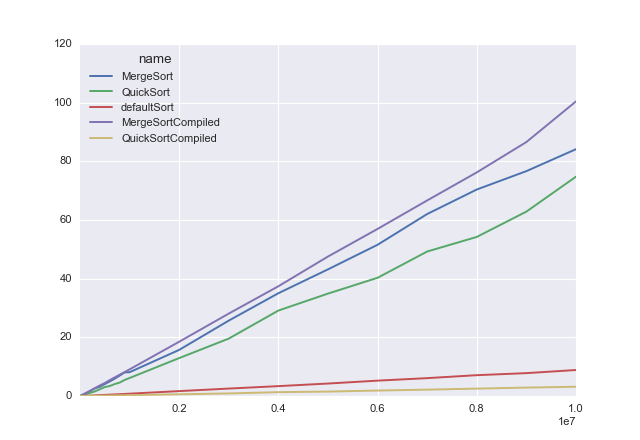

In [72]:
df2.plot()

<IPython.core.display.Javascript object>


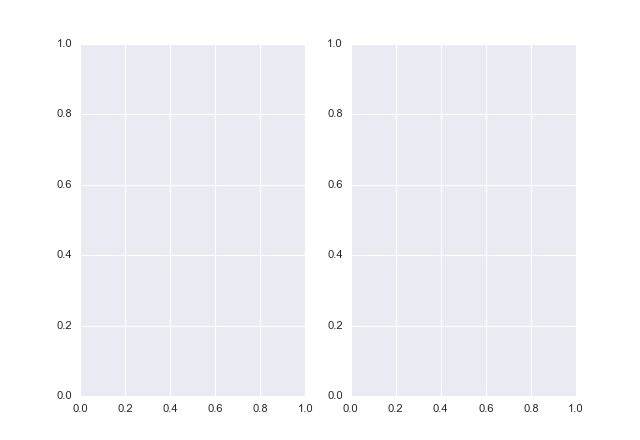

TypeError: lmplot() got an unexpected keyword argument 'ax'

In [32]:
import seaborn as sbs
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2)
sbs.lmplot("x","MergeSort", data=df1, fit_reg=False, ax=axs[0])
sbs.lmplot("x","QuickSort", data=df1, fit_reg=False, ax=axs[0])

In [ ]:
df1['subset'] = np.select([df.col3 < 150, df.col3 < 400, df.col3 < 600],
                         [0, 1, 2], -1)
for color, label in zip('bgrm', [0, 1, 2, -1]):
    subset = df[df.subset == label]
    plt.scatter(subset.col1, subset.col2, s=120, c=color, label=str(label))
plt.legend()

